# <center> Analyse de la concentration de CO2, <center>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"    
# ‘all’|’last’|’last_expr’|’none’
#https://jupyter-console.readthedocs.io/en/4.0.1/config_options.html

Nous récupérons les données les plus récentes sur le site en pointant sur un fichier au format .csv, si cette récupération est possible nous enregistrons une copie de ce fichier. Si pour une raison quelconque nous n'arrivons pas a faire ce téléchargement, nous travaillons sur le dernières données téléchargé.

In [3]:
try:
    raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/"
                           "in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv",skiprows=56)
except OSError as err:
    print("Erreur lors du téléchargement : {0}".format(err))
    print("Nous téléchargeons les dernières données enregistrer sur notre PC")
    raw_data = pd.read_csv("monthly_in_situ_co2_mlo")
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise
else:
    raw_data.to_csv('monthly_in_situ_co2_mlo',index=True)

raw_data.head(5)
raw_data.tail(5)

Excel                 [ppm]      [ppm]         [ppm]  \
751  2020    8     44058   2020.6230    -99.99      -99.99       -99.99   
752  2020    9     44089   2020.7077    -99.99      -99.99       -99.99   
753  2020   10     44119   2020.7896    -99.99      -99.99       -99.99   
754  2020   11     44150   2020.8743    -99.99      -99.99       -99.99   
755  2020   12     44180   2020.9563    -99.99      -99.99       -99.99   

         [ppm]         [ppm]      [ppm].1  
751     -99.99        -99.99       -99.99  
752     -99.99        -99.99       -99.99  
753     -99.99        -99.99       -99.99  
754     -99.99        -99.99       -99.99  
755     -99.99        -99.99       -99.99

Nous voyons que les noms des colonnes ne sont pas très représentatives, nous modifions  les noms des colonnes

In [4]:
raw_data.columns
raw_data.columns = ['Yr','Mn','Date 1','Date 2','s1','s2','s3','s4','s5','s6']
data = raw_data

In [17]:
data.tail(10)

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5  \
738  2019   7   43661  2019.5370  411.85  411.03  412.36  411.57  411.85   
739  2019   8   43692  2019.6219  410.08  411.62  410.23  411.81  410.08   
740  2019   9   43723  2019.7068  408.55  412.06  408.52  412.05  408.55   
741  2019  10   43753  2019.7890  408.43  412.07  408.67  412.29  408.43   
742  2019  11   43784  2019.8740  410.28  412.56  410.29  412.54  410.28   
743  2019  12   43814  2019.9562  411.85  412.78  411.88  412.79  411.85   
744  2020   1   43845  2020.0410  413.37  413.33  413.11  413.05  413.37   
745  2020   2   43876  2020.1257  -99.99  -99.99  -99.99  -99.99  -99.99   
746  2020   3   43905  2020.2049  -99.99  -99.99  -99.99  -99.99  -99.99   
747  2020   4   43936  2020.2896  -99.99  -99.99  -99.99  -99.99  -99.99   

         s6  
738  411.03  
739  411.62  
740  412.06  
741  412.07  
742  412.56  
743  412.78  
744  413.33  
745  -99.99  
746  -99.99  
747  -99.99

Les données vide sont représentés par la valeur -99.99, nous remplaçons cette valeur par une valeur plus adéquate NaN dans une autre DataFrame
while k>=i:
    data.loc[k]
    if data.loc[k].isnull().any():
        print(k)
    print(data.loc[k])
    k = k -1

In [21]:
date = datetime.date.today()
data = data.drop(data[(data.Yr == date.year) & (data.Mn > date.month)].index)
data = data.replace(-99.99,np.NaN);
d = data[(data.Yr == date.year)].index
i = d[0]
k = d[-1]

while k>=i:
    data.loc[k]
    if data.loc[k].isnull().any():
        data = data.drop(k)
    else:
        break
    #print(data.loc[k])
    k = k -1


In [22]:
#data = data.replace(-99.99,np.NaN);
data

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5  \
0    1958   1   21200  1958.0411     NaN     NaN     NaN     NaN     NaN   
1    1958   2   21231  1958.1260     NaN     NaN     NaN     NaN     NaN   
2    1958   3   21259  1958.2027  315.70  314.44  316.19  314.91  315.70   
3    1958   4   21290  1958.2877  317.45  315.16  317.30  314.99  317.45   
4    1958   5   21320  1958.3699  317.51  314.71  317.86  315.06  317.51   
5    1958   6   21351  1958.4548     NaN     NaN  317.24  315.14  317.24   
6    1958   7   21381  1958.5370  315.86  315.19  315.86  315.22  315.86   
7    1958   8   21412  1958.6219  314.93  316.19  314.00  315.29  314.93   
8    1958   9   21443  1958.7068  313.21  316.08  312.46  315.35  313.21   
9    1958  10   21473  1958.7890     NaN     NaN  312.44  315.40  312.44   
10   1958  11   21504  1958.8740  313.33  315.20  313.62  315.46  313.33   
11   1958  12   21534  1958.9562  314.67  315.43  314.77  315.51  314.67   
12   1959   1   21565  1959.0411  315.58  315.54  315.62  315.57  315.58   
13   1959   2   21596  1959.1260  316.49  315.86  316.27  315.63  316.49   
14   1959   3   21624  1959.2027  316.65  315.38  316.98  315.69  316.65   
15   1959   4   21655  1959.2877  317.72  315.42  318.09  315.77  317.72   
16   1959   5   21685  1959.3699  318.29  315.49  318.65  315.85  318.29   
17   1959   6   21716  1959.4548  318.15  316.03  318.04  315.94  318.15   
18   1959   7   21746  1959.5370  316.54  315.86  316.67  316.03  316.54   
19   1959   8   21777  1959.6219  314.80  316.06  314.83  316.12  314.80   
20   1959   9   21808  1959.7068  313.84  316.72  313.32  316.22  313.84   
21   1959  10   21838  1959.7890  313.33  316.32  313.33  316.30  313.33   
22   1959  11   21869  1959.8740  314.81  316.68  314.54  316.39  314.81   
23   1959  12   21899  1959.9562  315.58  316.35  315.72  316.47  315.58   
24   1960   1   21930  1960.0410  316.43  316.39  316.61  316.56  316.43   
25   1960   2   21961  1960.1257  316.98  316.35  317.27  316.64  316.98   
26   1960   3   21990  1960.2049  317.58  316.28  318.03  316.71  317.58   
27   1960   4   22021  1960.2896  319.03  316.70  319.14  316.79  319.03   
28   1960   5   22051  1960.3716  320.04  317.22  319.67  316.86  320.04   
29   1960   6   22082  1960.4563  319.59  317.48  319.01  316.93  319.59   
..    ...  ..     ...        ...     ...     ...     ...     ...     ...   
715  2017   8   42962  2017.6219  405.24  406.77  405.20  406.76  405.24   
716  2017   9   42993  2017.7068  403.27  406.76  403.41  406.92  403.27   
717  2017  10   43023  2017.7890  403.64  407.25  403.47  407.07  403.64   
718  2017  11   43054  2017.8740  405.17  407.43  404.98  407.22  405.17   
719  2017  12   43084  2017.9562  406.75  407.68  406.46  407.37  406.75   
720  2018   1   43115  2018.0411  408.05  408.00  407.58  407.52  408.05   
721  2018   2   43146  2018.1260  408.34  407.59  408.44  407.68  408.34   
722  2018   3   43174  2018.2027  409.25  407.71  409.39  407.82  409.25   
723  2018   4   43205  2018.2877  410.30  407.51  410.82  408.00  410.30   
724  2018   5   43235  2018.3699  411.30  407.90  411.60  408.20  411.30   
725  2018   6   43266  2018.4548  410.88  408.30  410.97  408.42  410.88   
726  2018   7   43296  2018.5370  408.90  408.08  409.43  408.65  408.90   
727  2018   8   43327  2018.6219  407.10  408.63  407.33  408.91  407.10   
728  2018   9   43358  2018.7068  405.59  409.09  405.66  409.18  405.59   
729  2018  10   43388  2018.7890  405.99  409.62  405.83  409.44  405.99   
730  2018  11   43419  2018.8740  408.12  410.39  407.47  409.72  408.12   
731  2018  12   43449  2018.9562  409.23  410.16  409.07  409.97  409.23   
732  2019   1   43480  2019.0411  410.92  410.87  410.29  410.23  410.92   
733  2019   2   43511  2019.1260  411.66  410.90  411.24  410.47  411.66   
734  2019   3   43539  2019.2027  412.00  410.45  412.25  410.68  412.00   
735  2019   4   43570  2019.2877  413.52  410.72  413.7

On visualise les lignes dont une donnée colonne est manquante.

In [128]:
data[data.isnull().any(axis=1)]

Yr  Mn  Date 1     Date 2  s1  s2      s3      s4      s5      s6
0    1958   1   21200  1958.0411 NaN NaN     NaN     NaN     NaN     NaN
1    1958   2   21231  1958.1260 NaN NaN     NaN     NaN     NaN     NaN
5    1958   6   21351  1958.4548 NaN NaN  317.24  315.14  317.24  315.14
9    1958  10   21473  1958.7890 NaN NaN  312.44  315.40  312.44  315.40
73   1964   2   23422  1964.1257 NaN NaN  320.01  319.36  320.01  319.36
74   1964   3   23451  1964.2049 NaN NaN  320.74  319.41  320.74  319.41
75   1964   4   23482  1964.2896 NaN NaN  321.83  319.45  321.83  319.45
745  2020   2   43876  2020.1257 NaN NaN     NaN     NaN     NaN     NaN
746  2020   3   43905  2020.2049 NaN NaN     NaN     NaN     NaN     NaN
747  2020   4   43936  2020.2896 NaN NaN     NaN     NaN     NaN     NaN
748  2020   5   43966  2020.3716 NaN NaN     NaN     NaN     NaN     NaN
749  2020   6   43997  2020.4563 NaN NaN     NaN     NaN     NaN     NaN
750  2020   7   44027  2020.5383 NaN NaN     NaN     NaN     NaN     NaN
751  2020   8   44058  2020.6230 NaN NaN     NaN     NaN     NaN     NaN
752  2020   9   44089  2020.7077 NaN NaN     NaN     NaN     NaN     NaN
753  2020  10   44119  2020.7896 NaN NaN     NaN     NaN     NaN     NaN
754  2020  11   44150  2020.8743 NaN NaN     NaN     NaN     NaN     NaN
755  2020  12   44180  2020.9563 NaN NaN     NaN     NaN     NaN     NaN

In [129]:
data.head()

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5      s6
0  1958   1   21200  1958.0411     NaN     NaN     NaN     NaN     NaN     NaN
1  1958   2   21231  1958.1260     NaN     NaN     NaN     NaN     NaN     NaN
2  1958   3   21259  1958.2027  315.70  314.44  316.19  314.91  315.70  314.44
3  1958   4   21290  1958.2877  317.45  315.16  317.30  314.99  317.45  315.16
4  1958   5   21320  1958.3699  317.51  314.71  317.86  315.06  317.51  314.71

On ajoute un index ' périod' à la DataFrame, cet index représente la période de mesure. 
Cette date est mise dans au format compréhensible par pandas. On visualise toutes les lignes qui seront supprimées.

In [130]:
data['period'] = pd.Series([datetime.date(y,m,1) for y,m in zip(data['Yr'],data['Mn'])])
data1 = data.dropna().copy()
data1 = data1.set_index('period')   
data1.head()

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4  \
period                                                                    
1958-03-01  1958   3   21259  1958.2027  315.70  314.44  316.19  314.91   
1958-04-01  1958   4   21290  1958.2877  317.45  315.16  317.30  314.99   
1958-05-01  1958   5   21320  1958.3699  317.51  314.71  317.86  315.06   
1958-07-01  1958   7   21381  1958.5370  315.86  315.19  315.86  315.22   
1958-08-01  1958   8   21412  1958.6219  314.93  316.19  314.00  315.29   

                s5      s6  
period                      
1958-03-01  315.70  314.44  
1958-04-01  317.45  315.16  
1958-05-01  317.51  314.71  
1958-07-01  315.86  315.19  
1958-08-01  314.93  316.19

Représentation graphique de la concentration  de CO2 de 1958 à nos jours

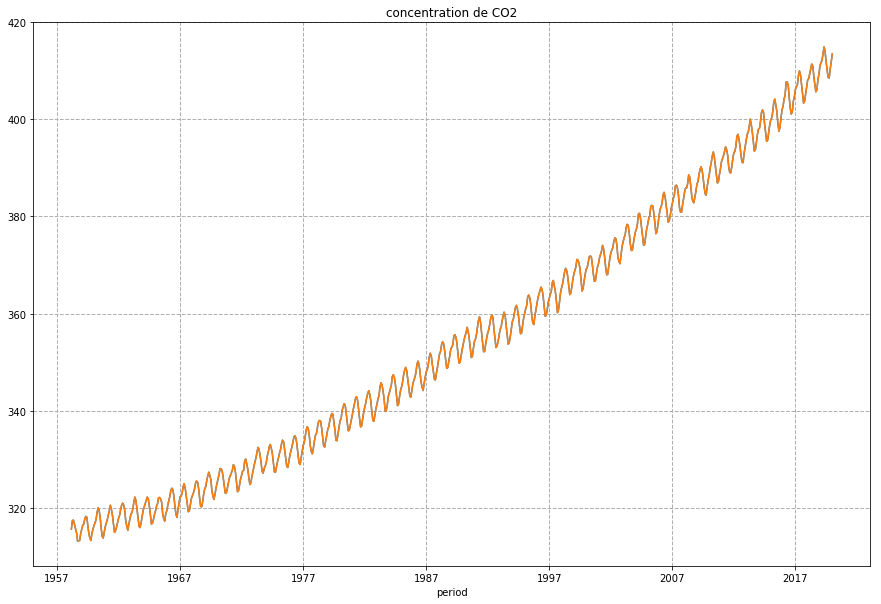

In [131]:
data1['s1'].plot(title = 'concentration de CO2',);
data1['s1'].plot(figsize=(15, 10),).grid(linestyle='--', linewidth=1);

Nous allons approximé la concentration de CO2 avec une droite, puis faire la différence pour 
n'obtenir que les variations de la concentration de CO2.

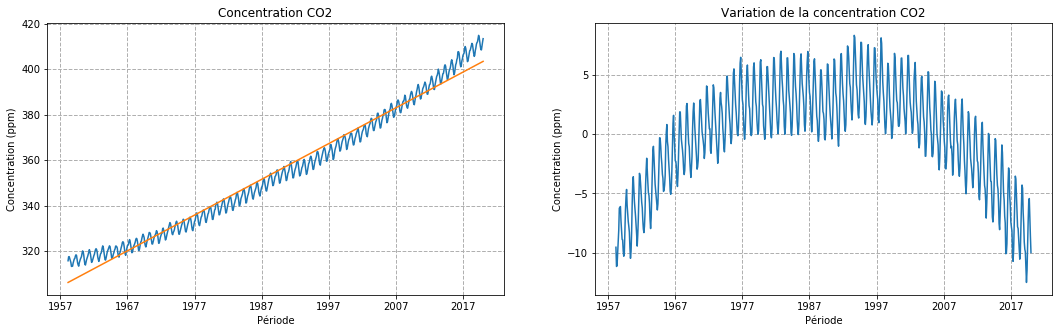

In [143]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data1['Date 2'], data1['s1'])
def predict(x):
    return slope*x+intercept

data_lineaire = data1.copy()
data_lineaire['reg_lineaire'] = predict(data_lineaire['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)
#plot(figsize=(8, 5))  .plot(figsize=(15, 10), grid=True).grid(linestyle='--', linewidth=1);

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data_lineaire['s1'])
#data1['s1'].plot()
ax1.plot(data_lineaire['reg_lineaire']) 
data_lineaire['co2'] = data_lineaire['reg_lineaire']-data_lineaire['s1']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data_lineaire['co2']); 

Le résultat n'est pas satisfaisant ...
Nous pouvons faire une optimisation avec une fonction de la forme $a*(x-b)^2+c$

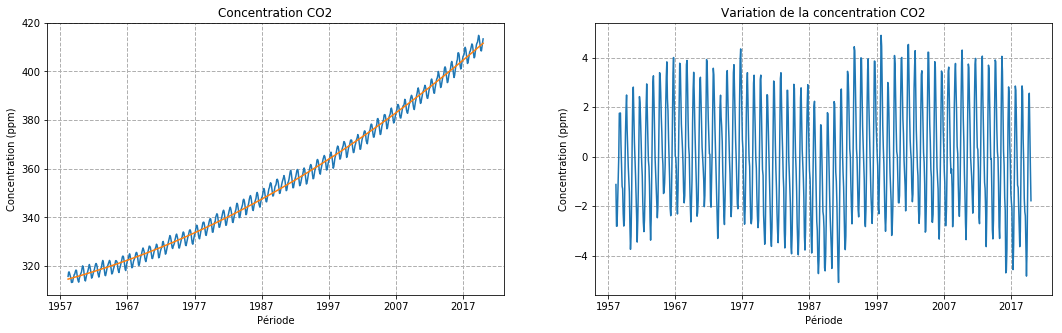

In [148]:
from scipy.optimize import curve_fit

def func(x,a,b,c):
    return a*(x-b)**(2)+c

data_cube = data1.copy()

x = data_cube['Date 2']
y = data_cube['s1']
popt, pcov = curve_fit(func,x,y)

def fa(x):
    return popt[0]*(x- popt[1])**(2)+popt[2]

data_cube['reg_cube'] = fa(data_cube['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data_cube['s1'])
ax1.plot(data_cube['reg_cube']) 
data_cube['co2'] = data_cube['reg_cube']-data_cube['s1']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data_cube['co2']); 